<h1> Social Network Analytics Assignment 1 </h1>
<h2> Team Members: </h2>
<h3>
Mukund Sood     - 01FB15ECS363 <br />
Srinivas Shekar - 01FB15ECS308 <br />
Vaishnavi Rao   - 01FB15ECS334
</h3>

<h2> CODE </h2>

In [1]:
# Importing Libraries

import networkx as nx
import matplotlib.pyplot as  plt
from operator import itemgetter
import pandas as pd
import numpy as np

import scipy
from scipy.stats.stats import pearsonr

import collections

import community

from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import k_clique_communities

In [2]:
# Creating the graph using the given gml file

G = nx.read_gml('/media/hduser/OS_Install/Mechanical Engineering/Sem VII/Social Network Analytics/Assignments/Assignment 1/lesmis.gml')

### a. Visualization with networkx layouts

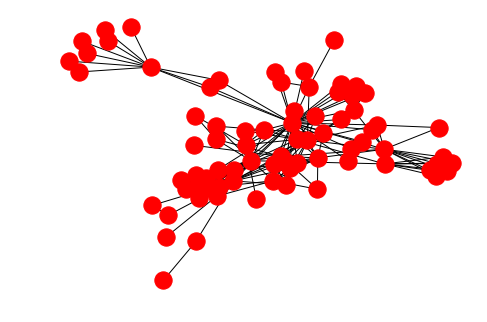

In [3]:
nx.draw(G)

# Uncomment to view the graph with labeled nodes
# nx.draw_networkx(G)

### b. List the nodes and edges with their attributes

In [4]:
edge_attributes = list(G.edges(data=True))
nodes = list(G.nodes())

print("Nodes are as follows:")
for node in nodes:
    print("Node:", node)

print("\n\n\nEdge Attributes are as follows:")
for attribute in edge_attributes:
    print("Node:", attribute[0], "Node:", attribute[1], "Value:", attribute[2]['value'])


Nodes are as follows:
Node: Myriel
Node: Napoleon
Node: MlleBaptistine
Node: MmeMagloire
Node: CountessDeLo
Node: Geborand
Node: Champtercier
Node: Cravatte
Node: Count
Node: OldMan
Node: Labarre
Node: Valjean
Node: Marguerite
Node: MmeDeR
Node: Isabeau
Node: Gervais
Node: Tholomyes
Node: Listolier
Node: Fameuil
Node: Blacheville
Node: Favourite
Node: Dahlia
Node: Zephine
Node: Fantine
Node: MmeThenardier
Node: Thenardier
Node: Cosette
Node: Javert
Node: Fauchelevent
Node: Bamatabois
Node: Perpetue
Node: Simplice
Node: Scaufflaire
Node: Woman1
Node: Judge
Node: Champmathieu
Node: Brevet
Node: Chenildieu
Node: Cochepaille
Node: Pontmercy
Node: Boulatruelle
Node: Eponine
Node: Anzelma
Node: Woman2
Node: MotherInnocent
Node: Gribier
Node: Jondrette
Node: MmeBurgon
Node: Gavroche
Node: Gillenormand
Node: Magnon
Node: MlleGillenormand
Node: MmePontmercy
Node: MlleVaubois
Node: LtGillenormand
Node: Marius
Node: BaronessT
Node: Mabeuf
Node: Enjolras
Node: Combeferre
Node: Prouvaire
Node: Feui

### c. Do a centrality analysis (degree, closeness, betweenness, eigenvector) of all the nodes

In [5]:
# Calculating Degree centrality for all nodes in the graph

deg_centrality = nx.degree_centrality(G)
sorted_deg_centrality = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)

print('Degree centrality: \n')

for key_value in sorted_deg_centrality:
    print(key_value[0], ":", key_value[1])

Degree centrality: 

Valjean : 0.47368421052631576
Gavroche : 0.2894736842105263
Marius : 0.25
Javert : 0.22368421052631576
Thenardier : 0.21052631578947367
Fantine : 0.19736842105263158
Enjolras : 0.19736842105263158
Courfeyrac : 0.17105263157894735
Bossuet : 0.17105263157894735
Bahorel : 0.15789473684210525
Joly : 0.15789473684210525
MmeThenardier : 0.14473684210526316
Cosette : 0.14473684210526316
Eponine : 0.14473684210526316
Mabeuf : 0.14473684210526316
Combeferre : 0.14473684210526316
Feuilly : 0.14473684210526316
Myriel : 0.13157894736842105
Grantaire : 0.13157894736842105
Gueulemer : 0.13157894736842105
Babet : 0.13157894736842105
Claquesous : 0.13157894736842105
Tholomyes : 0.11842105263157894
Prouvaire : 0.11842105263157894
Montparnasse : 0.11842105263157894
Bamatabois : 0.10526315789473684
Listolier : 0.09210526315789473
Fameuil : 0.09210526315789473
Blacheville : 0.09210526315789473
Favourite : 0.09210526315789473
Dahlia : 0.09210526315789473
Zephine : 0.09210526315789473
G

In [6]:
# Calculating Betweenness centrality for all nodes in the graph

bet_centrality = nx.betweenness_centrality(G)
sorted_bet_centrality = sorted(bet_centrality.items(), key=itemgetter(1), reverse=True)

print('Betweenness centrality: \n')

for key_value in sorted_bet_centrality:
    print(key_value[0], ":", key_value[1])

Betweenness centrality: 

Valjean : 0.5699890527836184
Myriel : 0.17684210526315788
Gavroche : 0.16511250242584766
Marius : 0.132032488621946
Fantine : 0.12964454098819422
Thenardier : 0.07490122123424225
Javert : 0.05433155966478436
MlleGillenormand : 0.047598927875243675
Enjolras : 0.0425533568221771
Tholomyes : 0.04062934817733579
Bossuet : 0.03075365017995782
MmeThenardier : 0.02900241873046176
Mabeuf : 0.027661236424394314
Fauchelevent : 0.026491228070175437
MmeBurgon : 0.02631578947368421
Cosette : 0.023796253454148188
Gillenormand : 0.02021062158319776
Eponine : 0.011487550654163002
Simplice : 0.008640295033483888
Bamatabois : 0.008040935672514621
Pontmercy : 0.006925438596491228
Courfeyrac : 0.00526702988198833
Gueulemer : 0.004960383978389518
Babet : 0.004960383978389518
Claquesous : 0.00486180419559921
Montparnasse : 0.0038738298738298727
Bahorel : 0.0021854883087570067
Joly : 0.0021854883087570067
Combeferre : 0.0012501455659350393
Feuilly : 0.0012501455659350393
Brujon : 0.

In [7]:
# Calculating Closeness centrality for all nodes in the graph

close_centrality = nx.closeness_centrality(G)
sorted_close_centrality = sorted(close_centrality.items(), key=itemgetter(1), reverse=True)

print('Closeness centrality: \n')

for key_value in sorted_close_centrality:
    print(key_value[0], ":", key_value[1])

Closeness centrality: 

Valjean : 0.6440677966101694
Marius : 0.5314685314685315
Thenardier : 0.5170068027210885
Javert : 0.5170068027210885
Gavroche : 0.5135135135135135
Enjolras : 0.4810126582278481
Cosette : 0.4779874213836478
Bossuet : 0.475
Gueulemer : 0.4634146341463415
Babet : 0.4634146341463415
Fantine : 0.46060606060606063
MmeThenardier : 0.46060606060606063
Montparnasse : 0.4578313253012048
Claquesous : 0.4523809523809524
Gillenormand : 0.4418604651162791
MlleGillenormand : 0.4418604651162791
Myriel : 0.4293785310734463
Bamatabois : 0.42696629213483145
Simplice : 0.4175824175824176
MlleBaptistine : 0.41304347826086957
MmeMagloire : 0.41304347826086957
Marguerite : 0.41304347826086957
Judge : 0.40425531914893614
Champmathieu : 0.40425531914893614
Brevet : 0.40425531914893614
Chenildieu : 0.40425531914893614
Cochepaille : 0.40425531914893614
Fauchelevent : 0.4021164021164021
Woman2 : 0.4021164021164021
Toussaint : 0.4021164021164021
Courfeyrac : 0.4
MotherInnocent : 0.397905759

In [8]:
# Calculating Eigenvector centrality for all nodes in the graph

eigen_centrality = nx.eigenvector_centrality(G)
sorted_eigen_centrality = sorted(eigen_centrality.items(), key=itemgetter(1), reverse=True)

print('Eigenvector centrality: \n')

for key_value in sorted_eigen_centrality:
    print(key_value[0], ":", key_value[1])

Eigenvector centrality: 

Gavroche : 0.31783893977497674
Valjean : 0.2676181759885393
Enjolras : 0.26717863282356663
Marius : 0.25911114534178753
Bossuet : 0.24213078637474134
Courfeyrac : 0.23246719717021405
Bahorel : 0.22155360926119963
Joly : 0.22155360926119963
Combeferre : 0.21073457488115616
Feuilly : 0.21073457488115616
Mabeuf : 0.1950289120366476
Thenardier : 0.1878077051550095
Grantaire : 0.18663538887401082
Javert : 0.1842251632102571
Prouvaire : 0.17581635449396732
Gueulemer : 0.14543155406625
Babet : 0.14543155406625
Eponine : 0.1419382736148947
Claquesous : 0.1415362730656279
MmeHucheloup : 0.14071116072806064
Montparnasse : 0.13602919446668407
MmeThenardier : 0.12228242172143365
Cosette : 0.11103702398134037
Brujon : 0.10128691502674182
Fantine : 0.08975922949834117
Gillenormand : 0.06539729702430212
MlleGillenormand : 0.06316905144338801
Bamatabois : 0.06227506194694948
Tholomyes : 0.048146155864012094
Woman2 : 0.04688494243431426
Toussaint : 0.04688494243431426
Simplice

In [9]:
# Looking at a comparison of the centralities for each character by creating a pandas dataframe

centrality_measures = {
'Degree': deg_centrality,
'Betweenness': bet_centrality,
'Closeness': close_centrality,
'Eigenvector':eigen_centrality,
}

centrality_comparison = pd.DataFrame(centrality_measures)

print(centrality_comparison)


                    Degree  Betweenness  Closeness  Eigenvector
Anzelma           0.039474     0.000000   0.351852     0.037652
Babet             0.131579     0.004960   0.463415     0.145432
Bahorel           0.157895     0.002185   0.393782     0.221554
Bamatabois        0.105263     0.008041   0.426966     0.062275
BaronessT         0.026316     0.000000   0.351852     0.027029
Blacheville       0.092105     0.000000   0.340807     0.019686
Bossuet           0.171053     0.030754   0.475000     0.242131
Boulatruelle      0.013158     0.000000   0.342342     0.015643
Brevet            0.078947     0.000000   0.404255     0.041208
Brujon            0.092105     0.000439   0.380000     0.101287
Champmathieu      0.078947     0.000000   0.404255     0.041208
Champtercier      0.013158     0.000000   0.301587     0.002343
Chenildieu        0.078947     0.000000   0.404255     0.041208
Child1            0.026316     0.000000   0.342342     0.028879
Child2            0.026316     0.000000 

### d. Calculate Pearson Correlation coefficient between each pair of centrality ( vectors)

In [10]:
# Using the values from the created dataframe to ensure the correct values are being compared
# ie - Anzelma's Degree Centrality value against Anzelma's Betweenness Centrality value

deg_data = centrality_comparison['Degree']
bet_data = centrality_comparison['Betweenness']
close_data = centrality_comparison['Closeness']
eigen_data = centrality_comparison['Eigenvector']

print("Pearson Correlation Coefficient between:")

deg_bet = pearsonr(deg_data,bet_data)
print("1. Degree and Betweenness Centrality:", deg_bet[0])

deg_close = pearsonr(deg_data,close_data)
print("2. Degree and Closeness Centrality:", deg_close[0])

deg_eigen = pearsonr(deg_data,eigen_data)
print("3. Degree and eigenvector:", deg_eigen[0])

bet_close = pearsonr(bet_data,close_data)
print("4. Betweennness and Closeness Centrality:", bet_close[0])

eigen_close = pearsonr(eigen_data,close_data)
print("5. Eigenvector and Closeness Centrality:", eigen_close[0])

bet_eigen = pearsonr(bet_data,eigen_data)
print("6. Betweennness and Eigenvector Centrality :", bet_eigen[0])


Pearson Correlation Coefficient between:
1. Degree and Betweenness Centrality: 0.7468277390180279
2. Degree and Closeness Centrality: 0.799696181150709
3. Degree and eigenvector: 0.8467554898585746
4. Betweennness and Closeness Centrality: 0.6287339146009843
5. Eigenvector and Closeness Centrality: 0.681251832608923
6. Betweennness and Eigenvector Centrality : 0.4231081214412298


### e. Draw a degree distribution histogram and a log-log plot

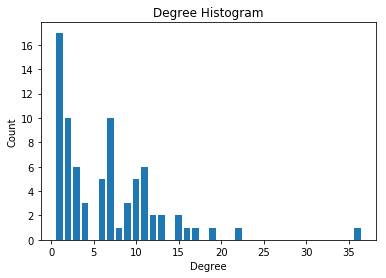

In [11]:
# Extracting the degrees of each node in the graph
degree_sequence = sorted([d for n,d in G.degree()], reverse=True) # degree sequence

# Getting a count of the number of occurences of each degree 
degreeCount = collections.Counter(degree_sequence)

# Plotting the histogram
plt.bar(degreeCount.keys(), degreeCount.values())
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

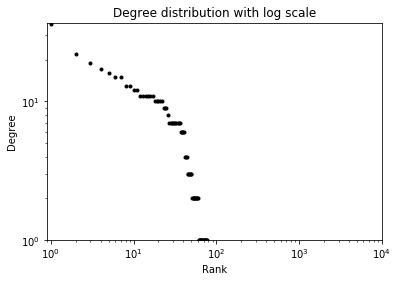

In [12]:
# Plotting the Log Degree Distribution

plt.loglog(range(1,G.order()+1),degree_sequence,'k.')

plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')

plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)

plt.show()

### f. Find degree assortativity for the nodes

In [13]:
r = nx.degree_assortativity_coefficient(G)
print("Degree Assortativity for all nodes in the graph: %3.1f\n"%r)

Degree Assortativity for all nodes in the graph: -0.2



### g. Find the shortest paths between the pairs of nodes

In [14]:
pairs = nx.all_pairs_shortest_path(G)

for pair in pairs:
    for i in pair:
        print(i, "\n\n")

Myriel 


{'Myriel': ['Myriel'], 'Napoleon': ['Myriel', 'Napoleon'], 'MlleBaptistine': ['Myriel', 'MlleBaptistine'], 'MmeMagloire': ['Myriel', 'MmeMagloire'], 'CountessDeLo': ['Myriel', 'CountessDeLo'], 'Geborand': ['Myriel', 'Geborand'], 'Champtercier': ['Myriel', 'Champtercier'], 'Cravatte': ['Myriel', 'Cravatte'], 'Count': ['Myriel', 'Count'], 'OldMan': ['Myriel', 'OldMan'], 'Valjean': ['Myriel', 'Valjean'], 'Labarre': ['Myriel', 'Valjean', 'Labarre'], 'Marguerite': ['Myriel', 'Valjean', 'Marguerite'], 'MmeDeR': ['Myriel', 'Valjean', 'MmeDeR'], 'Isabeau': ['Myriel', 'Valjean', 'Isabeau'], 'Gervais': ['Myriel', 'Valjean', 'Gervais'], 'Fantine': ['Myriel', 'Valjean', 'Fantine'], 'MmeThenardier': ['Myriel', 'Valjean', 'MmeThenardier'], 'Thenardier': ['Myriel', 'Valjean', 'Thenardier'], 'Cosette': ['Myriel', 'Valjean', 'Cosette'], 'Javert': ['Myriel', 'Valjean', 'Javert'], 'Fauchelevent': ['Myriel', 'Valjean', 'Fauchelevent'], 'Bamatabois': ['Myriel', 'Valjean', 'Bamatabois'], 'Simplice

### h. Find the diameter of the graph

In [15]:
diameter = (nx.diameter(G))

print("Diameter of the graphs is:", diameter)


Diameter of the graphs is: 5


### i. Find the network density

In [16]:
density= (nx.density(G))

print("Calculated Network Density of the graphs is:", density)

Calculated Network Density of the graphs is: 0.08680792891319207


### j. Find the top edges in terms of edge-betweenness

In [17]:
# Calculating Edge Betweenness Centrality for all nodes in the graph
edge_bet = nx.edge_betweenness_centrality(G, normalized=True, weight=None)

# Sorthing these values and extracting only the top threee
sorted_edge_bet = sorted(edge_bet.items(), key=lambda i:i[1], reverse=True)[:3]

print("Top Three Edge Betweenness Centralities: \n")

for item in sorted_edge_bet:
    print("Edge Betweenness Centrality from Node", item[0][0], "to Node", item[0][1], "is", item[1])


Top Three Edge Betweenness Centralities: 

Edge Betweenness Centrality from Node Myriel to Node Valjean is 0.18318523581681478
Edge Betweenness Centrality from Node Valjean to Node Gavroche is 0.08298247284530984
Edge Betweenness Centrality from Node Valjean to Node Fantine is 0.07620427321283742


### k. For the top 3 nodes ( in terms of degree centrality), draw the ego network and list their alters

In [18]:
print ("Top 3 nodes with highest degree centrality: \n")

# Use this list to keep the names of all the important nodes
nodes = []

for item in sorted_deg_centrality[:3]:
    print("Degree Centrality for Node", item[0], "is", item[1])
    nodes.append(item[0])

Top 3 nodes with highest degree centrality: 

Degree Centrality for Node Valjean is 0.47368421052631576
Degree Centrality for Node Gavroche is 0.2894736842105263
Degree Centrality for Node Marius is 0.25


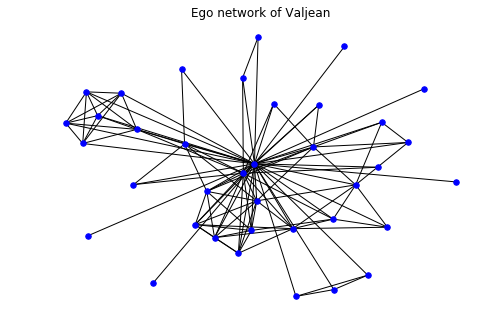

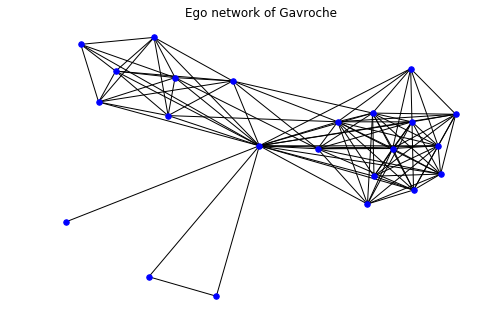

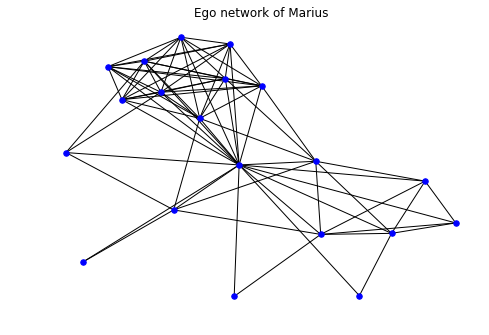

In [19]:
# Drawing the specific Ego Netwroks of the nodes with the top three degree centralities

for i in nodes:
    hub_ego=nx.ego_graph(G,i)
    pos=nx.spring_layout(hub_ego)
    nx.draw(hub_ego,pos,node_color='b',node_size=30,with_labels=False)
    plt.title("Ego network of "+i)
    plt.show()

In [20]:
# Printing the list of Alters for each of the above three nodes

for i in nodes:
    print("Alters for", i, "are:")
    for j in G.nodes():
        if (i,j) in G.edges():
            print(j, end="; ")
    print("\n")

Alters for Valjean are:
Myriel; MlleBaptistine; MmeMagloire; Labarre; Marguerite; MmeDeR; Isabeau; Gervais; Fantine; MmeThenardier; Thenardier; Cosette; Javert; Fauchelevent; Bamatabois; Simplice; Scaufflaire; Woman1; Judge; Champmathieu; Brevet; Chenildieu; Cochepaille; Woman2; MotherInnocent; Gavroche; Gillenormand; MlleGillenormand; Marius; Enjolras; Bossuet; Gueulemer; Babet; Claquesous; Montparnasse; Toussaint; 

Alters for Gavroche are:
Valjean; Thenardier; Javert; MmeBurgon; Marius; Mabeuf; Enjolras; Combeferre; Prouvaire; Feuilly; Courfeyrac; Bahorel; Bossuet; Joly; Grantaire; Gueulemer; Babet; Montparnasse; Child1; Child2; Brujon; MmeHucheloup; 

Alters for Marius are:
Valjean; Tholomyes; Thenardier; Cosette; Pontmercy; Eponine; Gavroche; Gillenormand; MlleGillenormand; LtGillenormand; BaronessT; Mabeuf; Enjolras; Combeferre; Feuilly; Courfeyrac; Bahorel; Bossuet; Joly; 



### l. Find the similarity between nodes. List the top five pairs in terms of structural similarity

In [21]:
# We have used the jaccard_coefficient to find the similarity between nodes

jaccard_coeffs = nx.jaccard_coefficient(G)

jaccard_list = {}

for node1, node2, coeff in jaccard_coeffs:
    print("Node1:", node1, "Node2:", node2, "Coefficient:", coeff)
    key = node1+" and "+node2
    jaccard_list[key] = coeff

Node1: MmeMagloire Node2: Zephine Coefficient: 0.0
Node1: MmeMagloire Node2: Montparnasse Coefficient: 0.09090909090909091
Node1: MmeMagloire Node2: Blacheville Coefficient: 0.0
Node1: MmeMagloire Node2: Fantine Coefficient: 0.058823529411764705
Node1: MmeMagloire Node2: Babet Coefficient: 0.08333333333333333
Node1: MmeMagloire Node2: LtGillenormand Coefficient: 0.0
Node1: MmeMagloire Node2: Boulatruelle Coefficient: 0.0
Node1: MmeMagloire Node2: Grantaire Coefficient: 0.0
Node1: MmeMagloire Node2: MmeHucheloup Coefficient: 0.0
Node1: MmeMagloire Node2: Prouvaire Coefficient: 0.0
Node1: MmeMagloire Node2: Favourite Coefficient: 0.0
Node1: MmeMagloire Node2: Dahlia Coefficient: 0.0
Node1: MmeMagloire Node2: Listolier Coefficient: 0.0
Node1: MmeMagloire Node2: Simplice Coefficient: 0.16666666666666666
Node1: MmeMagloire Node2: Perpetue Coefficient: 0.0
Node1: MmeMagloire Node2: Feuilly Coefficient: 0.0
Node1: MmeMagloire Node2: CountessDeLo Coefficient: 0.3333333333333333
Node1: MmeMaglo

Node1: Woman1 Node2: Anzelma Coefficient: 0.0
Node1: Woman1 Node2: Champmathieu Coefficient: 0.14285714285714285
Node1: Woman1 Node2: Cosette Coefficient: 0.18181818181818182
Node1: Zephine Node2: Montparnasse Coefficient: 0.0
Node1: Zephine Node2: MlleBaptistine Coefficient: 0.0
Node1: Zephine Node2: Babet Coefficient: 0.0
Node1: Zephine Node2: LtGillenormand Coefficient: 0.0
Node1: Zephine Node2: Boulatruelle Coefficient: 0.0
Node1: Zephine Node2: Grantaire Coefficient: 0.0
Node1: Zephine Node2: MmeHucheloup Coefficient: 0.0
Node1: Zephine Node2: Prouvaire Coefficient: 0.0
Node1: Zephine Node2: Simplice Coefficient: 0.1
Node1: Zephine Node2: Perpetue Coefficient: 0.125
Node1: Zephine Node2: Feuilly Coefficient: 0.0
Node1: Zephine Node2: CountessDeLo Coefficient: 0.0
Node1: Zephine Node2: Child2 Coefficient: 0.0
Node1: Zephine Node2: MmeDeR Coefficient: 0.0
Node1: Zephine Node2: Valjean Coefficient: 0.023809523809523808
Node1: Zephine Node2: Brevet Coefficient: 0.0
Node1: Zephine Node

Node1: Blacheville Node2: Chenildieu Coefficient: 0.0
Node1: Blacheville Node2: Cochepaille Coefficient: 0.0
Node1: Blacheville Node2: MmeThenardier Coefficient: 0.058823529411764705
Node1: Blacheville Node2: MmePontmercy Coefficient: 0.0
Node1: Blacheville Node2: MotherPlutarch Coefficient: 0.0
Node1: Blacheville Node2: MmeBurgon Coefficient: 0.0
Node1: Blacheville Node2: Joly Coefficient: 0.0
Node1: Blacheville Node2: Toussaint Coefficient: 0.0
Node1: Blacheville Node2: Gavroche Coefficient: 0.0
Node1: Blacheville Node2: Scaufflaire Coefficient: 0.0
Node1: Blacheville Node2: Enjolras Coefficient: 0.0
Node1: Blacheville Node2: Marguerite Coefficient: 0.125
Node1: Blacheville Node2: Geborand Coefficient: 0.0
Node1: Blacheville Node2: Count Coefficient: 0.0
Node1: Blacheville Node2: Isabeau Coefficient: 0.0
Node1: Blacheville Node2: Champtercier Coefficient: 0.0
Node1: Blacheville Node2: Mabeuf Coefficient: 0.0
Node1: Blacheville Node2: OldMan Coefficient: 0.0
Node1: Blacheville Node2: 

Node1: Chenildieu Node2: Tholomyes Coefficient: 0.0
Node1: Chenildieu Node2: MmePontmercy Coefficient: 0.0
Node1: Chenildieu Node2: MotherPlutarch Coefficient: 0.0
Node1: Chenildieu Node2: Favourite Coefficient: 0.0
Node1: Chenildieu Node2: MmeBurgon Coefficient: 0.0
Node1: Chenildieu Node2: Joly Coefficient: 0.0
Node1: Chenildieu Node2: Toussaint Coefficient: 0.125
Node1: Chenildieu Node2: Dahlia Coefficient: 0.0
Node1: Chenildieu Node2: Gavroche Coefficient: 0.037037037037037035
Node1: Chenildieu Node2: Scaufflaire Coefficient: 0.16666666666666666
Node1: Chenildieu Node2: Listolier Coefficient: 0.0
Node1: Chenildieu Node2: Simplice Coefficient: 0.1111111111111111
Node1: Chenildieu Node2: Perpetue Coefficient: 0.0
Node1: Chenildieu Node2: Enjolras Coefficient: 0.05
Node1: Chenildieu Node2: Marguerite Coefficient: 0.14285714285714285
Node1: Chenildieu Node2: Geborand Coefficient: 0.0
Node1: Chenildieu Node2: Fameuil Coefficient: 0.0
Node1: Chenildieu Node2: Count Coefficient: 0.0
Node1

Node1: Prouvaire Node2: OldMan Coefficient: 0.0
Node1: Prouvaire Node2: Valjean Coefficient: 0.07142857142857142
Node1: Prouvaire Node2: Brevet Coefficient: 0.0
Node1: Prouvaire Node2: Gueulemer Coefficient: 0.05555555555555555
Node1: Prouvaire Node2: Gervais Coefficient: 0.0
Node1: Prouvaire Node2: Magnon Coefficient: 0.0
Node1: Prouvaire Node2: MlleGillenormand Coefficient: 0.0
Node1: Prouvaire Node2: BaronessT Coefficient: 0.0
Node1: Prouvaire Node2: Claquesous Coefficient: 0.05555555555555555
Node1: Prouvaire Node2: Javert Coefficient: 0.08333333333333333
Node1: Prouvaire Node2: Gribier Coefficient: 0.0
Node1: Prouvaire Node2: Jondrette Coefficient: 0.0
Node1: Prouvaire Node2: Brujon Coefficient: 0.06666666666666667
Node1: Prouvaire Node2: Myriel Coefficient: 0.0
Node1: Prouvaire Node2: Gillenormand Coefficient: 0.0
Node1: Prouvaire Node2: Thenardier Coefficient: 0.041666666666666664
Node1: Prouvaire Node2: Labarre Coefficient: 0.0
Node1: Prouvaire Node2: Marius Coefficient: 0.4
No

Node1: Toussaint Node2: Brevet Coefficient: 0.125
Node1: Toussaint Node2: Gueulemer Coefficient: 0.18181818181818182
Node1: Toussaint Node2: Gervais Coefficient: 0.3333333333333333
Node1: Toussaint Node2: Magnon Coefficient: 0.0
Node1: Toussaint Node2: MlleGillenormand Coefficient: 0.25
Node1: Toussaint Node2: BaronessT Coefficient: 0.0
Node1: Toussaint Node2: Bossuet Coefficient: 0.06666666666666667
Node1: Toussaint Node2: Claquesous Coefficient: 0.18181818181818182
Node1: Toussaint Node2: Gribier Coefficient: 0.0
Node1: Toussaint Node2: Jondrette Coefficient: 0.0
Node1: Toussaint Node2: Brujon Coefficient: 0.0
Node1: Toussaint Node2: Myriel Coefficient: 0.08333333333333333
Node1: Toussaint Node2: Gillenormand Coefficient: 0.25
Node1: Toussaint Node2: Thenardier Coefficient: 0.1875
Node1: Toussaint Node2: Labarre Coefficient: 0.3333333333333333
Node1: Toussaint Node2: Marius Coefficient: 0.1
Node1: Toussaint Node2: Child1 Coefficient: 0.0
Node1: Toussaint Node2: Bahorel Coefficient: 0

Node1: Mabeuf Node2: Brevet Coefficient: 0.0
Node1: Mabeuf Node2: Gueulemer Coefficient: 0.10526315789473684
Node1: Mabeuf Node2: Gervais Coefficient: 0.0
Node1: Mabeuf Node2: BaronessT Coefficient: 0.08333333333333333
Node1: Mabeuf Node2: MlleGillenormand Coefficient: 0.058823529411764705
Node1: Mabeuf Node2: Magnon Coefficient: 0.0
Node1: Mabeuf Node2: Brujon Coefficient: 0.125
Node1: Mabeuf Node2: Claquesous Coefficient: 0.10526315789473684
Node1: Mabeuf Node2: Javert Coefficient: 0.07692307692307693
Node1: Mabeuf Node2: Gribier Coefficient: 0.0
Node1: Mabeuf Node2: Jondrette Coefficient: 0.0
Node1: Mabeuf Node2: Myriel Coefficient: 0.0
Node1: Mabeuf Node2: Gillenormand Coefficient: 0.058823529411764705
Node1: Mabeuf Node2: Thenardier Coefficient: 0.125
Node1: Mabeuf Node2: Labarre Coefficient: 0.0
Node1: Mabeuf Node2: Child1 Coefficient: 0.08333333333333333
Node1: Mabeuf Node2: Bamatabois Coefficient: 0.0
Node1: Mabeuf Node2: Judge Coefficient: 0.0
Node1: Mabeuf Node2: Anzelma Coef

Node1: Child1 Node2: Bamatabois Coefficient: 0.0
Node1: Child1 Node2: Courfeyrac Coefficient: 0.07142857142857142
Node1: Child1 Node2: Anzelma Coefficient: 0.0
Node1: Child1 Node2: Judge Coefficient: 0.0
Node1: Child1 Node2: Listolier Coefficient: 0.0
Node1: Child1 Node2: Cravatte Coefficient: 0.0
Node1: Child1 Node2: Eponine Coefficient: 0.0
Node1: Child1 Node2: Cosette Coefficient: 0.0
Node1: Bahorel Node2: Bamatabois Coefficient: 0.0
Node1: Bahorel Node2: Judge Coefficient: 0.0
Node1: Bahorel Node2: Anzelma Coefficient: 0.0
Node1: Bahorel Node2: Listolier Coefficient: 0.0
Node1: Bahorel Node2: Cravatte Coefficient: 0.0
Node1: Bahorel Node2: Eponine Coefficient: 0.15
Node1: Bahorel Node2: Cosette Coefficient: 0.045454545454545456
Node1: Bamatabois Node2: Courfeyrac Coefficient: 0.0
Node1: Bamatabois Node2: Anzelma Coefficient: 0.0
Node1: Bamatabois Node2: Listolier Coefficient: 0.07142857142857142
Node1: Bamatabois Node2: Cravatte Coefficient: 0.0
Node1: Bamatabois Node2: Eponine Coe

In [42]:
# Finding the jaccard_coefficient for the top five similaritites
sorted_list = sorted(jaccard_list.items(), key=itemgetter(1), reverse=True)[0:30]

em = []

for pair in sorted_list:
    print(pair[0], pair[1])
    em.append(pair[0])
    em.append(pair[1])

Napoleon and CountessDeLo 1.0
Napoleon and Cravatte 1.0
Napoleon and Geborand 1.0
Napoleon and Count 1.0
Napoleon and Champtercier 1.0
Napoleon and OldMan 1.0
Woman2 and Toussaint 1.0
Scaufflaire and Isabeau 1.0
Scaufflaire and MmeDeR 1.0
Scaufflaire and Gervais 1.0
Scaufflaire and Labarre 1.0
Geborand and Count 1.0
Geborand and Champtercier 1.0
Geborand and CountessDeLo 1.0
Geborand and OldMan 1.0
Geborand and Cravatte 1.0
Count and Champtercier 1.0
Count and CountessDeLo 1.0
Count and OldMan 1.0
Count and Cravatte 1.0
Isabeau and MmeDeR 1.0
Isabeau and Gervais 1.0
Isabeau and Labarre 1.0
Champtercier and CountessDeLo 1.0
Champtercier and OldMan 1.0
Champtercier and Cravatte 1.0
CountessDeLo and OldMan 1.0
CountessDeLo and Cravatte 1.0
MmeDeR and Gervais 1.0
MmeDeR and Labarre 1.0


### m. Find the clustering coefficients of each node and the global clustering coefficient

In [23]:
# Extracting clustering coefficients of all nodes in the graph
clustering_coeffs = nx.clustering(G)

print("The Clustering Coefficient of:")
for coeff in clustering_coeffs:
    print(coeff, "is", clustering_coeffs[coeff])

print('\nGlobal clustering coefficient is:', nx.average_clustering(G))

The Clustering Coefficient of:
Myriel is 0.06666666666666667
Napoleon is 0
MlleBaptistine is 1.0
MmeMagloire is 1.0
CountessDeLo is 0
Geborand is 0
Champtercier is 0
Cravatte is 0
Count is 0
OldMan is 0
Labarre is 0
Valjean is 0.12063492063492064
Marguerite is 1.0
MmeDeR is 0
Isabeau is 0
Gervais is 0
Tholomyes is 0.6111111111111112
Listolier is 1.0
Fameuil is 1.0
Blacheville is 1.0
Favourite is 1.0
Dahlia is 1.0
Zephine is 1.0
Fantine is 0.3142857142857143
MmeThenardier is 0.4909090909090909
Thenardier is 0.4083333333333333
Cosette is 0.38181818181818183
Javert is 0.3235294117647059
Fauchelevent is 0.3333333333333333
Bamatabois is 0.6428571428571429
Perpetue is 1.0
Simplice is 0.6666666666666666
Scaufflaire is 0
Woman1 is 1.0
Judge is 1.0
Champmathieu is 1.0
Brevet is 1.0
Chenildieu is 1.0
Cochepaille is 1.0
Pontmercy is 0.3333333333333333
Boulatruelle is 0
Eponine is 0.45454545454545453
Anzelma is 1.0
Woman2 is 1.0
MotherInnocent is 1.0
Gribier is 0
Jondrette is 0
MmeBurgon is 0
Gavr

### n. Detect sub-structures ( k clique, K core etc)

In [24]:
# Detecting k-cliques

cliques = list(k_clique_communities(G, 4))

ctr = 1

for clique in cliques:
    print("Clique", ctr)
    
    for member in clique:
        print(member, end="; ")
        
    ctr += 1
    print("\n")

Clique 1
Fameuil; Blacheville; Zephine; Tholomyes; Favourite; Listolier; Dahlia; Fantine; 

Clique 2
Simplice; Enjolras; Montparnasse; Feuilly; Combeferre; Mabeuf; Woman2; Valjean; Gueulemer; Bossuet; Brujon; Claquesous; Babet; Fantine; Javert; MlleGillenormand; Toussaint; Eponine; LtGillenormand; Gillenormand; Thenardier; MmeThenardier; Grantaire; Marius; Prouvaire; MmeHucheloup; Bahorel; Bamatabois; Courfeyrac; Anzelma; Joly; Gavroche; Cosette; 

Clique 3
Myriel; Valjean; MmeMagloire; MlleBaptistine; 

Clique 4
Bamatabois; Judge; Chenildieu; Cochepaille; Valjean; Brevet; Champmathieu; 



In [49]:
# Detecting k-components

components = nx.k_components(G)
ctr = 1

for component in components:
    print("Component", ctr)
    print(components[component], "\n")
    ctr += 1

Component 1
[{'Enjolras', 'Grantaire', 'Prouvaire', 'Bahorel', 'Feuilly', 'Combeferre', 'Courfeyrac', 'Bossuet', 'Joly', 'Gavroche'}, {'Enjolras', 'Marius', 'Bahorel', 'Feuilly', 'Mabeuf', 'Combeferre', 'Courfeyrac', 'Bossuet', 'Joly', 'Gavroche'}] 

Component 2
[{'Enjolras', 'Grantaire', 'Marius', 'Prouvaire', 'Gavroche', 'Bahorel', 'Feuilly', 'Combeferre', 'Mabeuf', 'Courfeyrac', 'Joly', 'Bossuet'}] 

Component 3
[{'Favourite', 'Fameuil', 'Zephine', 'Tholomyes', 'Blacheville', 'Listolier', 'Dahlia', 'Fantine'}, {'Babet', 'Javert', 'Eponine', 'Thenardier', 'MmeThenardier', 'Montparnasse', 'Valjean', 'Gueulemer', 'Gavroche', 'Brujon', 'Claquesous'}, {'Enjolras', 'Grantaire', 'MmeHucheloup', 'Marius', 'Prouvaire', 'Gavroche', 'Bahorel', 'Feuilly', 'Combeferre', 'Mabeuf', 'Courfeyrac', 'Joly', 'Bossuet'}] 

Component 4
[{'Bamatabois', 'Judge', 'Chenildieu', 'Cochepaille', 'Valjean', 'Brevet', 'Champmathieu'}, {'Favourite', 'Fameuil', 'Zephine', 'Tholomyes', 'Blacheville', 'Listolier', 'D

In [26]:
# Detecting k-cores

cores = nx.k_core(G, 9)
ctr = 1

for core in cores:
    print("Core", ctr)
    print(cores[core], "\n")
    ctr += 1

Core 1
{'Gavroche': {'value': 7}, 'Marius': {'value': 7}, 'Mabeuf': {'value': 1}, 'Combeferre': {'value': 15}, 'Prouvaire': {'value': 4}, 'Feuilly': {'value': 6}, 'Courfeyrac': {'value': 17}, 'Bahorel': {'value': 4}, 'Bossuet': {'value': 10}, 'Joly': {'value': 5}, 'Grantaire': {'value': 3}} 

Core 2
{'Enjolras': {'value': 3}, 'Gavroche': {'value': 1}, 'Combeferre': {'value': 1}, 'Prouvaire': {'value': 1}, 'Feuilly': {'value': 1}, 'Courfeyrac': {'value': 2}, 'Bahorel': {'value': 1}, 'Bossuet': {'value': 3}, 'Joly': {'value': 2}} 

Core 3
{'Enjolras': {'value': 7}, 'Gavroche': {'value': 4}, 'Mabeuf': {'value': 1}, 'Combeferre': {'value': 5}, 'Feuilly': {'value': 1}, 'Courfeyrac': {'value': 9}, 'Bahorel': {'value': 1}, 'Bossuet': {'value': 5}, 'Joly': {'value': 2}} 

Core 4
{'Enjolras': {'value': 4}, 'Grantaire': {'value': 1}, 'Gavroche': {'value': 1}, 'Combeferre': {'value': 2}, 'Feuilly': {'value': 2}, 'Courfeyrac': {'value': 3}, 'Bahorel': {'value': 2}, 'Bossuet': {'value': 2}, 'Joly':

### o. Detect community using Louvain and Clique percolation methods

In [47]:
# Generating communities using the built-in algorithm

generated_communities = girvan_newman(G)

ctr = 1

for communiti in generated_communities:
    print("Community", ctr)
    for member in communiti: 
        print(member, end=";\n")
    print("\n")
    ctr += 1

Community 1
{'MmeMagloire', 'Myriel', 'Geborand', 'Count', 'Champtercier', 'Napoleon', 'CountessDeLo', 'OldMan', 'Cravatte', 'MlleBaptistine'};
{'MlleVaubois', 'Woman1', 'Zephine', 'Montparnasse', 'Fauchelevent', 'Combeferre', 'Woman2', 'Blacheville', 'Pontmercy', 'MotherInnocent', 'Babet', 'Fantine', 'Chenildieu', 'LtGillenormand', 'Cochepaille', 'MmeThenardier', 'Grantaire', 'MmeHucheloup', 'Prouvaire', 'Boulatruelle', 'Tholomyes', 'MmePontmercy', 'MotherPlutarch', 'Favourite', 'MmeBurgon', 'Toussaint', 'Joly', 'Gavroche', 'Dahlia', 'Scaufflaire', 'Listolier', 'Simplice', 'Enjolras', 'Perpetue', 'Marguerite', 'Fameuil', 'Isabeau', 'Mabeuf', 'Feuilly', 'MmeDeR', 'Child2', 'Valjean', 'Brevet', 'Gueulemer', 'Gervais', 'MlleGillenormand', 'Bossuet', 'Claquesous', 'Magnon', 'Brujon', 'Javert', 'Gribier', 'BaronessT', 'Jondrette', 'Gillenormand', 'Thenardier', 'Labarre', 'Marius', 'Child1', 'Bahorel', 'Bamatabois', 'Judge', 'Anzelma', 'Courfeyrac', 'Champmathieu', 'Eponine', 'Cosette'};




Community 10
{'MmeMagloire', 'Myriel', 'Geborand', 'Count', 'Champtercier', 'Napoleon', 'CountessDeLo', 'OldMan', 'Cravatte', 'MlleBaptistine'};
{'Simplice', 'Chenildieu', 'Cochepaille', 'Labarre', 'Woman1', 'Isabeau', 'Bamatabois', 'Judge', 'MmeDeR', 'Valjean', 'Brevet', 'Champmathieu', 'Gervais', 'Scaufflaire'};
{'Favourite', 'Perpetue', 'Fameuil', 'Marguerite', 'Zephine', 'Tholomyes', 'Blacheville', 'Listolier', 'Dahlia', 'Fantine'};
{'Babet', 'Javert', 'Thenardier', 'MmeThenardier', 'Montparnasse', 'Anzelma', 'Pontmercy', 'Gueulemer', 'Eponine', 'Brujon', 'Claquesous'};
{'Magnon', 'LtGillenormand', 'Gillenormand', 'MlleVaubois', 'BaronessT', 'MmePontmercy', 'Woman2', 'Toussaint', 'MlleGillenormand', 'Cosette'};
{'Gribier', 'Fauchelevent', 'MotherInnocent'};
{'Boulatruelle'};
{'MmeBurgon', 'Jondrette'};
{'Enjolras', 'Grantaire', 'MmeHucheloup', 'Marius', 'Prouvaire', 'Bahorel', 'Mabeuf', 'Combeferre', 'Feuilly', 'Courfeyrac', 'Bossuet', 'Joly', 'Gavroche'};
{'MotherPlutarch'};
{'Chi

Community 40
{'MmeMagloire', 'MlleBaptistine', 'Myriel'};
{'Napoleon'};
{'CountessDeLo'};
{'Geborand'};
{'Champtercier'};
{'Cravatte'};
{'Count'};
{'OldMan'};
{'Labarre'};
{'Chenildieu', 'Cochepaille', 'Bamatabois', 'Judge', 'Valjean', 'Brevet', 'Champmathieu'};
{'Marguerite'};
{'MmeDeR'};
{'Isabeau'};
{'Gervais'};
{'Fameuil', 'Zephine', 'Tholomyes', 'Dahlia', 'Blacheville', 'Listolier', 'Favourite', 'Fantine'};
{'MmeThenardier'};
{'Babet', 'Thenardier', 'Montparnasse', 'Gueulemer', 'Eponine', 'Brujon', 'Claquesous'};
{'Toussaint', 'Cosette'};
{'Javert'};
{'Gribier', 'Fauchelevent'};
{'Perpetue'};
{'Simplice'};
{'Scaufflaire'};
{'Woman1'};
{'Pontmercy'};
{'Boulatruelle'};
{'Anzelma'};
{'Woman2'};
{'MotherInnocent'};
{'MmeBurgon', 'Jondrette'};
{'Enjolras', 'Grantaire', 'Prouvaire', 'Bahorel', 'Feuilly', 'Combeferre', 'Courfeyrac', 'Bossuet', 'Joly', 'Gavroche'};
{'Gillenormand', 'BaronessT'};
{'Magnon'};
{'MlleVaubois', 'MlleGillenormand'};
{'MmePontmercy'};
{'LtGillenormand'};
{'Mariu

Community 56
{'Myriel'};
{'Napoleon'};
{'MlleBaptistine'};
{'MmeMagloire'};
{'CountessDeLo'};
{'Geborand'};
{'Champtercier'};
{'Cravatte'};
{'Count'};
{'OldMan'};
{'Labarre'};
{'Valjean'};
{'Marguerite'};
{'MmeDeR'};
{'Isabeau'};
{'Gervais'};
{'Tholomyes'};
{'Listolier'};
{'Fameuil'};
{'Blacheville'};
{'Favourite'};
{'Dahlia'};
{'Zephine'};
{'Fantine'};
{'MmeThenardier'};
{'Thenardier'};
{'Cosette'};
{'Javert'};
{'Fauchelevent'};
{'Bamatabois'};
{'Perpetue'};
{'Simplice'};
{'Scaufflaire'};
{'Woman1'};
{'Judge'};
{'Champmathieu'};
{'Cochepaille', 'Brevet', 'Chenildieu'};
{'Pontmercy'};
{'Boulatruelle'};
{'Babet', 'Montparnasse', 'Gueulemer', 'Eponine', 'Brujon', 'Claquesous'};
{'Anzelma'};
{'Woman2'};
{'MotherInnocent'};
{'Gribier'};
{'MmeBurgon', 'Jondrette'};
{'Enjolras', 'Grantaire', 'Prouvaire', 'Bahorel', 'Feuilly', 'Combeferre', 'Courfeyrac', 'Bossuet', 'Joly', 'Gavroche'};
{'Gillenormand', 'BaronessT'};
{'Magnon'};
{'MlleVaubois', 'MlleGillenormand'};
{'MmePontmercy'};
{'LtGillen

{'Grantaire'};
{'MotherPlutarch'};
{'Gueulemer'};
{'Babet'};
{'Montparnasse', 'Brujon', 'Claquesous'};
{'Toussaint'};
{'Child1', 'Child2'};
{'MmeHucheloup'};


Community 74
{'Myriel'};
{'Napoleon'};
{'MlleBaptistine'};
{'MmeMagloire'};
{'CountessDeLo'};
{'Geborand'};
{'Champtercier'};
{'Cravatte'};
{'Count'};
{'OldMan'};
{'Labarre'};
{'Valjean'};
{'Marguerite'};
{'MmeDeR'};
{'Isabeau'};
{'Gervais'};
{'Tholomyes'};
{'Listolier'};
{'Fameuil'};
{'Blacheville'};
{'Favourite'};
{'Dahlia'};
{'Zephine'};
{'Fantine'};
{'MmeThenardier'};
{'Thenardier'};
{'Cosette'};
{'Javert'};
{'Fauchelevent'};
{'Bamatabois'};
{'Perpetue'};
{'Simplice'};
{'Scaufflaire'};
{'Woman1'};
{'Judge'};
{'Champmathieu'};
{'Brevet'};
{'Chenildieu'};
{'Cochepaille'};
{'Pontmercy'};
{'Boulatruelle'};
{'Eponine'};
{'Anzelma'};
{'Woman2'};
{'MotherInnocent'};
{'Gribier'};
{'Jondrette'};
{'MmeBurgon'};
{'Gavroche'};
{'Gillenormand'};
{'Magnon'};
{'MlleGillenormand'};
{'MmePontmercy'};
{'MlleVaubois'};
{'LtGillenormand'};
{'Ma

In [28]:
# Community Detection using the function that implements the louvain method

# Computing the best partition
partition = community.best_partition(G)

ctr = 1

for com in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    
    print("Community", ctr)
    
    for node in list_nodes:
        print(node, end="; ")
    
    ctr += 1
    print("\n")

Community 1
Myriel; Napoleon; CountessDeLo; Geborand; Champtercier; Cravatte; Count; OldMan; 

Community 2
MlleBaptistine; MmeMagloire; Labarre; Valjean; Marguerite; MmeDeR; Isabeau; Gervais; Fauchelevent; Bamatabois; Scaufflaire; Woman1; Judge; Champmathieu; Brevet; Chenildieu; Cochepaille; MotherInnocent; Gribier; Toussaint; 

Community 3
Tholomyes; Listolier; Fameuil; Blacheville; Favourite; Dahlia; Zephine; Fantine; Perpetue; Simplice; 

Community 4
MmeThenardier; Thenardier; Javert; Boulatruelle; Eponine; Anzelma; Gueulemer; Babet; Claquesous; Montparnasse; Brujon; 

Community 5
Cosette; Pontmercy; Woman2; Gillenormand; Magnon; MlleGillenormand; MmePontmercy; MlleVaubois; LtGillenormand; Marius; BaronessT; 

Community 6
Jondrette; MmeBurgon; Gavroche; Mabeuf; Enjolras; Combeferre; Prouvaire; Feuilly; Courfeyrac; Bahorel; Bossuet; Joly; Grantaire; MotherPlutarch; Child1; Child2; MmeHucheloup; 



In [29]:
# Finding cliques using the Clique Percolation Method

# We use the inbuilt function that uses this method
cliques = nx.find_cliques(G)

ctr = 1

print("Clique Percolation Method:")

for clique in cliques:
    print("Clique", ctr)
    
    for member in clique:
        print(member, end="; ")
    
    ctr += 1
    print("\n")

Clique Percolation Method:
Clique 1
MlleVaubois; MlleGillenormand; 

Clique 2
Zephine; Favourite; Fameuil; Tholomyes; Listolier; Blacheville; Dahlia; Fantine; 

Clique 3
Napoleon; Myriel; 

Clique 4
Combeferre; Enjolras; Bahorel; Gavroche; Feuilly; Courfeyrac; Joly; Bossuet; Grantaire; Prouvaire; 

Clique 5
Combeferre; Enjolras; Bahorel; Gavroche; Feuilly; Courfeyrac; Joly; Bossuet; Mabeuf; Marius; 

Clique 6
Pontmercy; Thenardier; Marius; 

Clique 7
Pontmercy; MmePontmercy; 

Clique 8
LtGillenormand; Gillenormand; Marius; MlleGillenormand; Cosette; 

Clique 9
Boulatruelle; Thenardier; 

Clique 10
Grantaire; Enjolras; Bahorel; Gavroche; MmeHucheloup; Joly; Courfeyrac; Bossuet; 

Clique 11
Tholomyes; Marius; Cosette; 

Clique 12
MmePontmercy; MlleGillenormand; 

Clique 13
MotherPlutarch; Mabeuf; 

Clique 14
MmeBurgon; Jondrette; 

Clique 15
MmeBurgon; Gavroche; 

Clique 16
Perpetue; Simplice; Fantine; 

Clique 17
Geborand; Myriel; 

Clique 18
Count; Myriel; 

Clique 19
Champtercier; Myr

[0, 1, 2, 3, 4, 5]
[(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 2), (2, 4), (2, 3), (3, 3), (3, 4), (3, 5), (4, 4), (4, 5), (5, 5)]


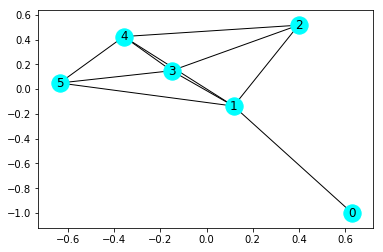

In [46]:
# Extracting the best partition from the entire network and visualizing it 

induced = community.induced_graph(partition, G)
print(induced.nodes())
print(induced.edges())

nx.draw_networkx(induced,node_color='cyan')

### ANALYSIS

<h3>a. Analyse centrality (contrast degree, closeness, betweenness, Eigenvector) and “centrality correlation” plots. Make comments about characters(any 4 and use your judgement) 
</h3> <br/>

<ol type="a">

<li> An analysis of the graph generated for the network shows us that Jean Valjean is the most popular character in the novel, with the highest degree centrality value of 0.4737; followed by Gavroche, Marius, and Javert. </li>

<li> Valjean also has the highest betweenness centrality (by a margin of ~0.4), indicative of his strong influence on the communication between other characters in the story. Myriel, with just 10 connections in the network, has the second highest betweenness centrality, thus proving that one doesn't need to have the highest number of connections in order to be influential given that Myriel acts as a bridge between various other characters. </li>

<li> Valjean is best suited to affect change quickly within the network, as suggested by his high closeness centrality value of 0.664, closely followed by Marius, who has a closeness centrality value of 0.5314, possibly owing to his association with the Friends of the ABC, the radical group of revolutionary students who are said to have joined in the Paris Uprising of 1832. </li>

<li> The only measure in which Valjean does not score above all others is in the EigenCentrality, where Gavroche has the highest value, signifying that he is the most "well-connected" character in the novel, with connections to some of the most influential people in the network, despite not directly being connected to Valjean himself. </li>

</ol>

<h3> b. Make a comment about the community/components detected in the context of the plot </h3> 

<p> 
K-cliques of size 4 were found which yielded 4 groups forming a community, and the characters in each have strong ties to each other in the particular chapter. For example, one of the cliques included: <br />
<ul>
<li> Blacheville </li>
<li> Listolier </li>
<li> Favourite </li>
<li> Fameuil </li>
<li> Tholomyes </li>
<li> Zephine </li>
<li> Fantine </li>
<li> Dahlia </li>
</ul>
In this clique, each pair of characters are a couple: Tholomyes and Fantine; Blacheville and Favourite; Listolier and Dahlia; Fameuil and Zephine, all of them are students studying in Paris, where Fantine had moved to seek her fortune.
</p>

<h3>c. Do you draw any conclusion or insight from structural similarity that you
calculated? </h3>

<p>
Some of the pairs of characters with the highest similarities (with a Jaccard coefficient of 1.0) are innkeeper Labarre and Gervais (from whom Valjean steals shortly after leaving Digne), Labarre and Scaufflaire, and Labarre and Isabeau (the baker, another one of Valjean's victims). These less-important characters from the story are structurally similar, meaning they have the same centrality values and are part of the same social group. This is because a small role in the play, has no interaction with any other characters in the play apart from the ones in the scene where the character is introduced. <br />
When we compare this to more important characters such as Valjean, we see that the structural similarity values he shares with the characters he is related to, they are much lower, showing that he interacts with many other characters, and that the characters he interacts with, do not interact only amongst each other, but with various characters across the play. <br />
</p>

<h3> d. Do the clustering analysis, density, diameter etc tell you anything? </h3> <br/>

<ol type="a">

<li> The clustering coefficient is a measure of local density in a network, which gives us the probability of our acquaintances being connected to each other as well. A low clustering coefficient indicates that most of our acquaintances do not know each other; and according to the results obtained, most of the central characters (as expected) have low clustering coefficients, since there is a high chance that not all of the characters they are acquainted with actually know each other, while some of the other not-so-significant characters in the story (eg., "Woman1", "Judge") have a clustering coefficient of 1.0, reflective of the fact that all the characters connected to them are also connected to each other, implying that their direct networks are quite small. </li>

<li> The network density is 0.0868, or 8%, which describes the portion of potential connections in the network that are actual connections. Then, in Les Misérables, only 8% of the total possible connections are actual connections. </li>

<li> The diameter of a network is the minimum number of hops between the farthest connection within the network. The diameter of the novel was found to be 5; ie., the shortest path length between the two farthest characters out of a possible 77 is 5. A short diameter such as this facilitates easy flow of information within the network. </li>

</ol>

<h3> e. Any interesting observations? </h3> 

<p>
Valjean, the lead, has a clustering coefficient of 0.1206: and while his ego network is dense, this low clustering coefficient shows that there isn't a lot of mutual trust among Valjean and his alters. Contrast this with Gavroche's ego network, which is both dense and has a high clustering coefficient (0.3549) -- and it is unsurprising, then, that the higher mutual trust in this network is what makes Gavroche Thénardier as significant to the plot as he is, which he goes on to prove when he joins the student revolutionaries in the barricades (where he loses his life). Gavroche builds strong connections throughout, while living on the streets of Paris after being thrown out of his house by his evil parents.
</p>
<p>
Tholomyes has a high structural similarity with Gillenormand. This is because both are rich [the word "wealthy" connects them. <br />
Tholomyes has also a high structural similarity with Thénardiers. This could possibly be because Cosette connects them or because they are both scoundrels.
</p>